In [1]:
#..........................案例1:
#.......................... 理解KNN
import numpy as np
import pandas as pd
import operator
# KNN函数
def classify0(inX, dataSet, labels, k): # inX输入向量
    dataSetSize = dataSet.shape[0]
    diffMat = np.tile(inX, (dataSetSize,1)) - dataSet # tile复制数据
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances**0.5 # 欧式距离
    sortedDistIndicies = distances.argsort() # 给出排序索引值
    classCount={}
    for i in range(k): # 最小距离点
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True) # 排序
    return sortedClassCount[0][0]
# 训练样本
def createDataSet():
    group = np.array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]]) # 训练样本dataSet
    labels = ['A','A','B','B'] # 训练样本标签labels
    return group, labels
group,labels=createDataSet()
print("[0,0]属于类别：",classify0([0,0],group,labels,3))

[0,0]属于类别： B


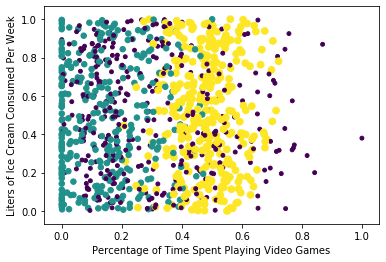

the total error rate is: 0.0833


In [2]:
#..........................案例2：
#..........................用KNN识别 如何用三种属性归类
dta0=pd.read_table(r'C:\Users\Wudey\Desktop\machinelearninginaction\Ch02\datingTestSet.txt',header=None)
# 第1列：'Distance of Fly'
# 第2列：'Percentage of Time Spent Playing Video Games'
# 第3列：'Liters of Ice Cream Consumed Per Week'
# 第4列：标签{'largeDoses':3,'smallDoses':2,'didntLike':1}
dat=dta0.iloc[:,[0,1,2]]
# 数据有单位时需要归一化
dat=np.array(dat.apply(lambda x:(x-np.min(x))/(np.max(x)-np.min(x))))
# 提取label，并转为数值
label=dta0.iloc[:,3]
datlabel=np.array(label.map({'largeDoses':3,'smallDoses':2,'didntLike':1}))
# 画图看看
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(dat[:,1], dat[:,2], 15.0*datlabel, 15.0*datlabel) # scatter的上色
plt.xlabel('Percentage of Time Spent Playing Video Games')
plt.ylabel('Liters of Ice Cream Consumed Per Week')
plt.show()
# 输出结果
def datingClassTest(dat,datlabel,hoRatio=0.3,k=3): # 测试集比率hoRatio
    m = dat.shape[0]
    numTestVecs = int(m*hoRatio) # 测试集数量
    errorCount = 0.0 # 错误计数
    for i in range(numTestVecs):
        classifierResult = classify0(dat[i,:],dat[numTestVecs:m,:],datlabel[numTestVecs:m],k)
        if (classifierResult != datlabel[i]):
            errorCount += 1.0
    print("the total error rate is: %.4f" % (errorCount/float(numTestVecs)))
datingClassTest(dat,datlabel)

In [ ]:
#..........................案例3
#.......................... 识别手写，没有多大价值，不列出